# Aggregate Spectral Params
<p>created: Feb 1, 2023 <br>
last modified: Feb 13, 2024 </p>
<p>
This notebook was used to develop scripts.4_aggregate_params.py, which has been depricated. With the introduction of the SpecParam.to_df() method, aggregation of results is now performed in scripts.3_fit_psd.py.


#### Set-up

In [8]:
# general
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# lab
from specparam import SpectralGroupModel

# project
import sys
sys.path.append('../scripts')
from paths import PROJECT_PATH, EXTERNAL_PATH
from info import SESSIONS, FS

#### Examine fitting output for an example file

In [10]:
# 
fg = SpectralGroupModel()
fg.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP1_array1_LFP.csv")
fg.print_results()

                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 64                             
                                                                                                  
                       The model was run on the frequency range 1 - 100 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                               Power spectra were fit with a knee.                                
                                                                                                  
          

c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\fooof\objs\group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


In [11]:
fg_pre = SpectralGroupModel()
fg_post = SpectralGroupModel()
fg_pre.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP2_array4_LFP_pre.csv")
fg_post.load(r"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\L_SNR_250717\NSP2_array4_LFP_post.csv")

Text(0, 0.5, 'Post')

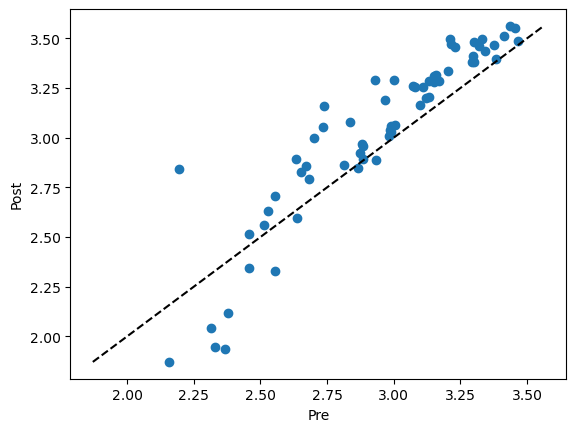

In [12]:
# get exponent
exp_pre = fg_pre.get_params('aperiodic_params', 'exponent')
exp_post = fg_post.get_params('aperiodic_params', 'exponent')

# plot difference in exponent
plt.scatter(exp_pre, exp_post)

# plot unity line
all_exp = np.concatenate((exp_pre, exp_post))
plt.plot([np.min(all_exp), np.max(all_exp)], [np.min(all_exp), np.max(all_exp)], 'k--')

# label axes
plt.xlabel('Pre')
plt.ylabel('Post')

### Aggregate results across all files

In [13]:
# create pandas DF
params = pd.DataFrame(columns = ['session', 'array', 'channel', 'pre_exp', 'post_exp', 'pre_r2', 'post_r2'])
params.head()

,session,array,channel,pre_exp,post_exp,pre_r2,post_r2


In [14]:
session = np.repeat('L_SNR_250717', len(exp_pre))
channel = np.linspace(0, len(exp_pre)-1, len(exp_pre))

In [17]:
N_ARRAYS = 16
allsessions_list = []

for session in SESSIONS :
    idx_nsp = 1
    df_arraylist = []
    for i_array in range(1, N_ARRAYS+1):
        # create dataframe
        df_array = pd.DataFrame(columns = ['session', 'array', 'channel', 'pre_exp', 'post_exp', 'pre_r2', 'post_r2'])

        # import data
        fg_pre = SpectralGroupModel()
        fg_post = SpectralGroupModel()
        fg_pre.load(fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\{session}\NSP{idx_nsp}_array{i_array}_LFP_pre.csv")
        fg_post.load(fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_params\{session}\NSP{idx_nsp}_array{i_array}_LFP_post.csv")

        # get exponent and add it to dataframe
        pre_exp = fg_pre.get_params('aperiodic_params', 'exponent')
        post_exp = fg_post.get_params('aperiodic_params', 'exponent')
        df_array['pre_exp'] = pre_exp
        df_array['post_exp'] = post_exp

        #  get r squared and add it to dataframe
        pre_r2 = fg_pre.get_params('r_squared')
        post_r2 = fg_post.get_params('r_squared')
        df_array['pre_r2'] = pre_r2
        df_array['post_r2'] = post_r2
        
        # add session, channel and array
        df_array['session'] = session
        df_array['channel'] = channel
        df_array['array'] = i_array

        # append df_array to params
        df_arraylist.append(df_array)
        # increment
        if i_array % 2 == 0:
            idx_nsp += 1

    # save dataframe per session
    df_session = pd.concat(df_arraylist)
    df_session.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\{session}_params_df.csv')

    # save all sessions dataframe
    allsessions_list.append(df_session)

df_allsessions = pd.concat(allsessions_list)
df_allsessions.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\allsessions_params_df.csv')
